# XGBOOST default model!

## Conect to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load and prepare data

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# load data

#file = '/content/drive/My Drive/Colab Notebooks/extract-features-3class.xlsx'
#labels_ = ['AU', 'WD', 'WW']
file = '/content/drive/My Drive/Colab Notebooks/extract-features-4class.xlsx'
labels_ = ['AU', 'WD', 'WW', 'BR']

#sheet = 'sections'
#sheet = 'surfaces'
sheet = 'sections+surfaces'
df = pd.read_excel(file, sheet_name=sheet)
#df.head()

In [ ]:
# split data into X and Y
X, Y = df.iloc[:,1:], df.iloc[:,0]
#print(X.head())
#print(Y.head())

In [ ]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

## Train the XGBoost Model

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


## Make Predictions with XGBoost Model

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
#print(predictions)

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("\n ********** Accuracy: %.2f%%" % (accuracy * 100.0),'**********')


 ********** Accuracy: 94.24% **********


In [ ]:
type(y_test)
y_test = y_test.tolist()
#print(y_test)

In [ ]:
# matrix confusion
data = {'y_Actual':    y_test,
        'y_Predicted': predictions
        }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
#df.to_csv(r'/content/drive/MyDrive/3 - Experiments/6 - Kindey stones/Proyecto_CalculosRenales/Avances/XGBoost/surfaces4class.csv')

In [ ]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print('\n ********** Confusion matrix **********  \n')
print(confusion_matrix)

column_maxes = confusion_matrix.max()
df_max = column_maxes.max()
normalized_df = confusion_matrix / df_max
print('\n ********** Normalized results **********  \n')
print(normalized_df)


 ********** Confusion matrix **********  

Predicted    1    2    3    4
Actual                       
1          237    7    0    3
2           12  222    5    6
3            2    6  232    1
4            6    8    1  242

 ********** Normalized results **********  

Predicted         1         2         3         4
Actual                                           
1          0.979339  0.028926  0.000000  0.012397
2          0.049587  0.917355  0.020661  0.024793
3          0.008264  0.024793  0.958678  0.004132
4          0.024793  0.033058  0.004132  1.000000


## Confusion Matrix

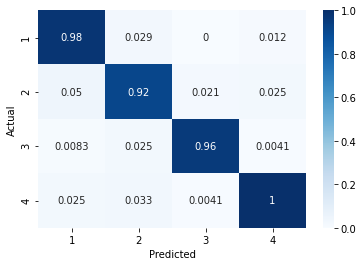

              precision    recall  f1-score   support

           1       0.92      0.96      0.94       247
           2       0.91      0.91      0.91       245
           3       0.97      0.96      0.97       241
           4       0.96      0.94      0.95       257

    accuracy                           0.94       990
   macro avg       0.94      0.94      0.94       990
weighted avg       0.94      0.94      0.94       990



In [ ]:
# Confusion Matrix using seaborn

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_test':    y_test,
        'y_pred': predictions
        }

df = pd.DataFrame(data, columns=['y_test','y_pred'])
confusion_matrix = pd.crosstab(df['y_test'], df['y_pred'], rownames=['Test'], colnames=['Predicted'])
sn.heatmap(normalized_df, annot=True, cmap="Blues")
plt.show()

from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))

## Tested 


### Table results

> Set | Classes | Accuracy | Precision | Recall | F1-score
>---      | --- | ---      | ---       |    --- | --- 
> Section |   4 | 89.19%   | 0.89      | 0.89   | 0.89 
> Surface |   4 | 84.85%   | 0.85      | 0.85   | 0.85 
> Mixed   |   4 | 94.24%   | 0.94.     | 0.94.  | 0.94



### Accuracy 89.19% - Section - 4 classes 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Accuracy 84.85% - Surface  - 4 classes 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Accuracy 94.24% - Mixed  - 4 classes

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Hyperparameter optimization

## Conect to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Functions



In [ ]:
import pandas as pd
import xgboost as xgb
import numpy as np
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

## Load and prepare data

In [ ]:
#file = '/content/drive/My Drive/Colab Notebooks/extract-features-3class.xlsx'
#labels_ = ['AU', 'WD', 'WW']
file = '/content/drive/My Drive/Colab Notebooks/extract-features-4class.xlsx'
labels_ = ['AU', 'WD', 'WW', 'BR']
#sheet = 'sections'
sheet = 'surfaces'
#sheet = 'sections+surfaces'
df = pd.read_excel(file, sheet_name=sheet)


# split data into X and Y
X, Y = df.iloc[:,1:], df.iloc[:,0]
xgb_model = xgb.XGBClassifier()
print(xgb_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


## Tuning the hyper-parameters

In [ ]:
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)
search.fit(X, Y)

print('\n ********** Hyper-parameters ********** \n')
report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 23.2min finished



 ********** Hyper-parameters ********** 

Model with rank: 1
Mean validation score: 0.748 (std: 0.048)
Parameters: {'colsample_bytree': 0.9213690750087304, 'gamma': 0.27717702625570034, 'learning_rate': 0.21351622387030567, 'max_depth': 4, 'n_estimators': 102, 'subsample': 0.699092395800463}



# XGBOOST hyper model

## Conect to Drive

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load and prepare data

In [37]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
# Load data
#file = '/content/drive/My Drive/Colab Notebooks/extract-features-3class.xlsx'
#labels_ = ['AU', 'WD', 'WW']
file = '/content/drive/My Drive/Colab Notebooks/extract-features-4class.xlsx'
labels_ = ['AU', 'WD', 'WW', 'BR']
#sheet = 'sections'
#sheet = 'surfaces'
sheet = 'sections+surfaces'
# Read excel file
df = pd.read_excel(file, sheet_name=sheet)

In [39]:
# split data into X and Y
X, Y = df.iloc[:,1:], df.iloc[:,0]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

## Train the XGBoost model with hyperparameters

In [40]:
# fit model no training data

model = XGBClassifier(
    base_score=0.5, booster='gbtree', 
    colsample_bylevel=1,
    colsample_bynode=1, 
    colsample_bytree=0.7467983561008608, 
    gamma=0.02904180608409973,
    learning_rate=0.28985284373248055, 
    max_delta_step=0, 
    max_depth=5,
    min_child_weight=1, 
    missing=None, 
    n_estimators=139, 
    n_jobs=1,
    nthread=None, 
    objective='multi:softprob', 
    random_state=42,
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=1, 
    seed=None,
    silent=None, 
    subsample=0.8832290311184181, 
    verbosity=1)

model.fit(X_train, y_train)
print(model,'\n')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7467983561008608,
              gamma=0.02904180608409973, learning_rate=0.28985284373248055,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
              n_estimators=139, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8832290311184181, verbosity=1) 



## Make predictions with XGBoost model

In [41]:
# Make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
#print(predictions)

# Evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("\n ********** Accuracy: %.2f%%" % (accuracy * 100.0),'**********')
y_test = y_test.tolist()


 ********** Accuracy: 96.36% **********


## Confusion Matrix

In [42]:
# Confusion_matrix
data = {'y_Actual':    y_test,
        'y_Predicted': predictions
        }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
#df.to_csv(r'/content/drive/MyDrive/3 - Experiments/6 - Kindey stones/Proyecto_CalculosRenales/Avances/XGBoost/surfaces4class.csv')
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print('\n ********** Confusion matrix **********  \n')
print(confusion_matrix)

# Normalized results
column_maxes = confusion_matrix.max()
df_max = column_maxes.max()
normalized_df = confusion_matrix / df_max
print('\n ********** Normalized results **********  \n')
print(normalized_df)


 ********** Confusion matrix **********  

Predicted    1    2    3    4
Actual                       
1          240    4    0    3
2            4  230    5    6
3            1    4  236    0
4            4    5    0  248

 ********** Normalized results **********  

Predicted         1         2         3         4
Actual                                           
1          0.967742  0.016129  0.000000  0.012097
2          0.016129  0.927419  0.020161  0.024194
3          0.004032  0.016129  0.951613  0.000000
4          0.016129  0.020161  0.000000  1.000000


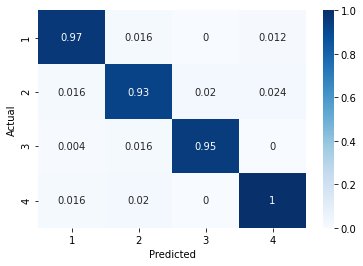

              precision    recall  f1-score   support

           1       0.96      0.97      0.97       247
           2       0.95      0.94      0.94       245
           3       0.98      0.98      0.98       241
           4       0.96      0.96      0.96       257

    accuracy                           0.96       990
   macro avg       0.96      0.96      0.96       990
weighted avg       0.96      0.96      0.96       990



In [43]:
# Confusion Matrix using seaborn

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_test':    y_test,
        'y_pred': predictions
        }

df = pd.DataFrame(data, columns=['y_test','y_pred'])
confusion_matrix = pd.crosstab(df['y_test'], df['y_pred'], rownames=['Test'], colnames=['Predicted'])
sn.heatmap(normalized_df, annot=True, cmap="Blues")
plt.show()

from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test, predictions)
print(classification_report(y_test, predictions))

## Hyper-parameters tested 



### Table results

> Set | Classes | Accuracy | Precision | Recall | F1-score
>---      | --- | ---      | ---       |    --- | --- 
> Section |   4 | 93.23%   | 0.93      | 0.93   | 0.93 
> Surface |   4 | 88.89%   | 0.89      | 0.89   | 0.89 
> Mixed   |   4 | 96.36%   | 0.96      | 0.96   | 0.96


### Accuracy  93.23% - Section - 4 clases 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9164789652253831,
              gamma=0.024047321982043846, learning_rate=0.2644543445254245,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
              n_estimators=140, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9002007699061254, verbosity=1) 

In [44]:
# ********** Accuracy: 93.23% **********

# Parameters: {'colsample_bytree': 0.9164789652253831, 'gamma': 0.024047321982043846, 'learning_rate': 0.2644543445254245, 'max_depth': 4, 'n_estimators': 140, 'subsample': 0.9002007699061254}

model = XGBClassifier(
    base_score=0.5, booster='gbtree', 
    colsample_bylevel=1,
    colsample_bynode=1, 
    colsample_bytree=0.9164789652253831, 
    gamma= 0.024047321982043846,
    learning_rate=0.2644543445254245, 
    max_delta_step=0, 
    max_depth=4,
    min_child_weight=1, 
    missing=None, 
    n_estimators=140, 
    n_jobs=1,
    nthread=None, 
    objective='multi:softprob', 
    random_state=42,
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=1, 
    seed=None,
    silent=None, 
    subsample=0.9002007699061254, 
    verbosity=1)

### Accuracy: 88.89% - Surface - 4 classes

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9213690750087304,
              gamma=0.27717702625570034, learning_rate=0.21351622387030567,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
              n_estimators=102, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.699092395800463, verbosity=1) 

In [45]:
# ********** Accuracy: 88.89% **********

# Parameters: {'colsample_bytree': 0.9213690750087304, 'gamma': 0.27717702625570034, 'learning_rate': 0.21351622387030567, 'max_depth': 4, 'n_estimators': 102, 'subsample': 0.699092395800463}

model = XGBClassifier(
    base_score=0.5, booster='gbtree', 
    colsample_bylevel=1,
    colsample_bynode=1, 
    colsample_bytree= 0.9213690750087304, 
    gamma=0.27717702625570034,
    learning_rate=0.21351622387030567, 
    max_delta_step=0, 
    max_depth=4,
    min_child_weight=1, 
    missing=None, 
    n_estimators=102, 
    n_jobs=1,
    nthread=None, 
    objective='multi:softprob', 
    random_state=42,
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=1, 
    seed=None,
    silent=None, 
    subsample=0.699092395800463, 
    verbosity=1)

### Accuracy 96.36% - Mixed  - 4 classes

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7467983561008608,
              gamma=0.02904180608409973, learning_rate=0.28985284373248055,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
              n_estimators=139, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8832290311184181, verbosity=1) 

In [46]:
# ********** Accuracy: 96.36% **********

model = XGBClassifier(
    base_score=0.5, booster='gbtree', 
    colsample_bylevel=1,
    colsample_bynode=1, 
    colsample_bytree=0.7467983561008608, 
    gamma=0.02904180608409973,
    learning_rate=0.28985284373248055, 
    max_delta_step=0, 
    max_depth=5,
    min_child_weight=1, 
    missing=None, 
    n_estimators=139, 
    n_jobs=1,
    nthread=None, 
    objective='multi:softprob', 
    random_state=42,
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=1, 
    seed=None,
    silent=None, 
    subsample=0.8832290311184181, 
    verbosity=1)

# Para Gilberto

## XGBoost default model

Los parámetros del modelo son los mismos para cada set: surface, section y mixed. 

> Set | Classes | Accuracy | Precision | Recall | F1-score
>---      | --- | ---      | ---       |    --- | --- 
> Section |   4 | 89.19%   | 0.89      | 0.89   | 0.89 
> Surface |   4 | 84.85%   | 0.85      | 0.85   | 0.85 
> Mixed   |   4 | 94.24%   | 0.94.     | 0.94.  | 0.94

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9164789652253831,
              gamma=0.024047321982043846, learning_rate=0.2644543445254245,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
              n_estimators=140, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9002007699061254, verbosity=1) 

## XGBoost hyper model

Los parámetros del modelo son diferentes para cada set: surface, section y mixed. 


> Set | Classes | Accuracy | Precision | Recall | F1-score
>---      | --- | ---      | ---       |    --- | --- 
> Section |   4 | 93.23%   | 0.93      | 0.93   | 0.93 
> Surface |   4 | 88.89%   | 0.89      | 0.89   | 0.89 
> Mixed   |   4 | 96.36%   | 0.96      | 0.96   | 0.96


### Accuracy  93.23% - Section - 4 clases 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9164789652253831,
              gamma=0.024047321982043846, learning_rate=0.2644543445254245,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
              n_estimators=140, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9002007699061254, verbosity=1) 

### Accuracy: 88.89% - Surface - 4 classes

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9213690750087304,
              gamma=0.27717702625570034, learning_rate=0.21351622387030567,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
              n_estimators=102, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.699092395800463, verbosity=1) 

### Accuracy 96.36% - Mixed  - 4 classes

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7467983561008608,
              gamma=0.02904180608409973, learning_rate=0.28985284373248055,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
              n_estimators=139, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8832290311184181, verbosity=1)              
